## Load the dataset

In [194]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


normalized_data = pd.read_csv('../Normalization/A1-synthetic-normalized.csv', sep='\t', header=None, skiprows=1)

X = normalized_data.iloc[:, :-1].values  # select all columns except the last as features
y = normalized_data.iloc[:, -1].values  # select the last column as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Model definition

In [195]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # initialize weights and biases with smaller initial values
        self.weights_input_to_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_to_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros(output_size)
        self.losses = []  # store training loss at each epoch

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0) * 1

    def forward_pass(self, x):
        # Hidden layer
        hidden_layer_input = np.dot(x, self.weights_input_to_hidden) + self.bias_hidden
        hidden_layer_output = self.relu(hidden_layer_input)

        # Output layer (Linear)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_to_output) + self.bias_output
        output = output_layer_input
        return output, hidden_layer_output

    def backward_pass(self, x, y, output, hidden_output, learning_rate):
        # calculate error
        error = output - y

        # calculate gradients for output layer (linear)
        d_weights_hidden_to_output = np.dot(hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0)

        # calculate gradients for hidden layer (ReLU)
        d_hidden_layer = np.dot(error, self.weights_hidden_to_output.T) * self.relu_derivative(hidden_output)
        d_weights_input_to_hidden = np.dot(x.T, d_hidden_layer)
        d_bias_hidden = np.sum(d_hidden_layer, axis=0)

        # update weights and biases
        self.weights_hidden_to_output -= learning_rate * d_weights_hidden_to_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_to_hidden -= learning_rate * d_weights_input_to_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

    def predict(self, x):
        output, _ = self.forward_pass(x)
        return output

    def train(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            output, hidden_output = self.forward_pass(x)
            self.backward_pass(x, y, output, hidden_output, learning_rate)

            # calculate and store the loss
            loss = np.mean((output - y) ** 2)
            self.losses.append(loss)

            # printing the loss periodically
            if epoch % (epochs // 10) == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss}")

    def loss_epochs(self):
        return np.array(self.losses)

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Model training

In [196]:
nn_synthetic = MyNeuralNetwork(input_size=9, hidden_size=8, output_size=1)  
nn_synthetic.train(X_train, y_train.reshape(-1, 1), learning_rate=0.0001, epochs=200)

Epoch 0, Loss: 0.9826415892986335
Epoch 20, Loss: 0.9776351047020322
Epoch 40, Loss: 0.9232147859329425
Epoch 60, Loss: 0.44274076450591227
Epoch 80, Loss: 0.0650688471552165
Epoch 100, Loss: 0.04186893848805296
Epoch 120, Loss: 0.035185083260389265
Epoch 140, Loss: 0.03232206839840603
Epoch 160, Loss: 0.030813506737475436
Epoch 180, Loss: 0.029861298541656627
Epoch 199, Loss: 0.029213572398902113


## Model Evaluation

In [197]:
predictions_train_synthetic = nn_synthetic.predict(X_train)
train_mape_synthetic = mean_absolute_percentage_error(y_train, predictions_train_synthetic)
print(f"Synthetic Data Training MAPE: {train_mape_synthetic:.2f}%")

predictions_test_synthetic = nn_synthetic.predict(X_test)
test_mape_synthetic = mean_absolute_percentage_error(y_test, predictions_test_synthetic)
print(f"Synthetic Data Test MAPE: {test_mape_synthetic:.2f}%")

Synthetic Data Training MAPE: 0.95%
Synthetic Data Test MAPE: 0.31%


## Predictions vs Actual Values Plot

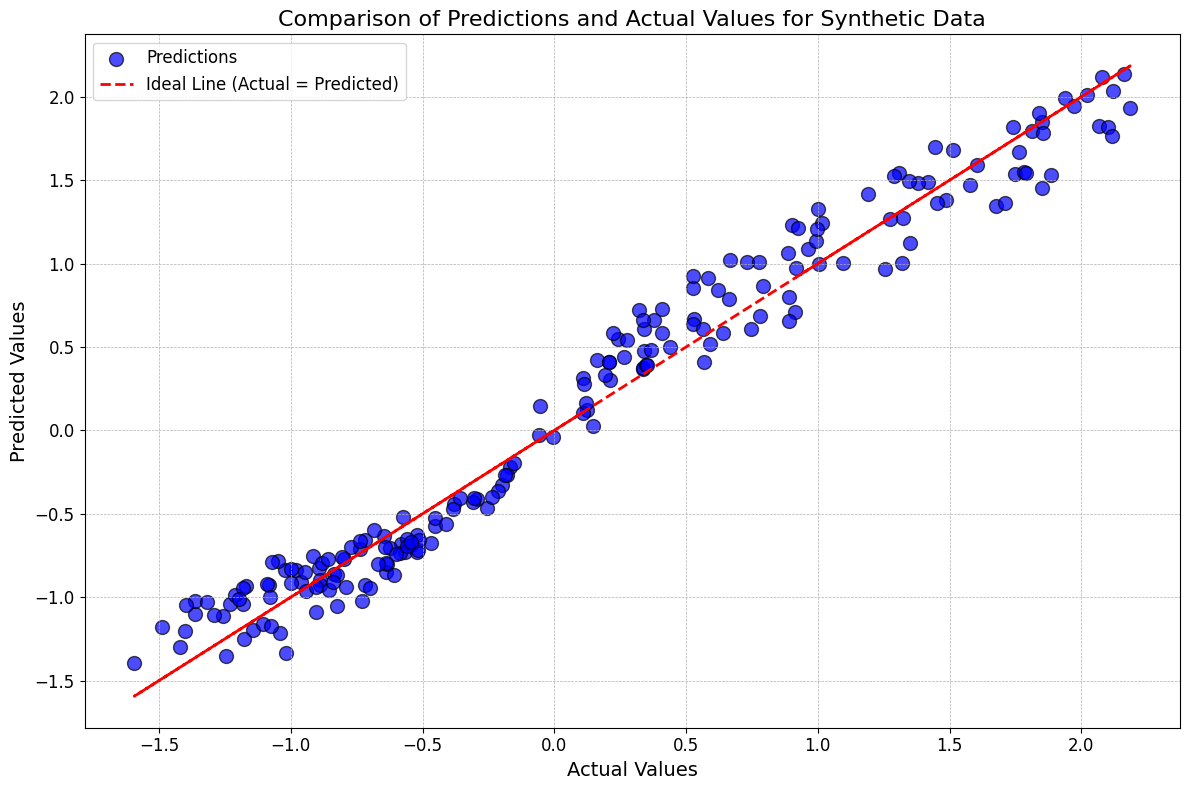

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions_test_synthetic, color='blue', edgecolor='k', label='Predictions', alpha=0.7, marker='o', s=100)
plt.plot(y_test, y_test, color='red', label='Ideal Line (Actual = Predicted)', linewidth=2, linestyle='--')
plt.title('Comparison of Predictions and Actual Values for Synthetic Data', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
